<a href="https://colab.research.google.com/github/githinjimary/DSI-TWIST3/blob/main/TWIST_3ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = open("/content/drive/MyDrive/twist3/scraped data.txt","r")

In [ ]:
data.read()

'\ufeffThe impact of COVID-19 school closures and stress on adolescent mental health in Kenya\n\nThe first case of COVID-19 reached Kenya in March 2020, triggering a national response, including closure of businesses and schools and strict curfews. While these measures may have saved lives, they also had widespread unintended secondary impacts on Kenyan households. Globally, researchers are finding\xa0higher-than-normal reports of depression, anxiety, and other mental health concerns. In Kenya specifically, recent news reports highlight worrisome trends of fires in schools, potentially linked with increased stress and\xa0difficulty adjusting as schools reopen. However, there is limited research available in African contexts on what works to address adolescent mental health, and the long-term impacts of the pandemic on education and mental health outcomes in the region are unknown.“I had anxiety because we left school when we were just about to sit for the exams, and then we left school

**GDELT DATASET**

In [ ]:
Data = pd.read_csv('/content/drive/MyDrive/twist3/kenya_education_2021.csv')
Data

,location,GKGRECORDID,Quotations,V2Tone,V2Themes
0,Kenya,20210315104500-T2399,NaN,"0.861586662190892,3.12185297079557,2.260266308...","EDUCATION,4961;EDUCATION,34221;EDUCATION,47620..."
1,Kenya,20210315104500-T2399,NaN,"0.861586662190892,3.12185297079557,2.260266308...","EDUCATION,4961;EDUCATION,34221;EDUCATION,47620..."
2,Kenya,20210315104500-T2399,NaN,"0.861586662190892,3.12185297079557,2.260266308...","EDUCATION,4961;EDUCATION,34221;EDUCATION,47620..."
3,Kenya,20210315104500-T2399,NaN,"0.861586662190892,3.12185297079557,2.260266308...","EDUCATION,4961;EDUCATION,34221;EDUCATION,47620..."
4,Kenyan,20210224151500-893,NaN,"4.23572744014733,5.52486187845304,1.2891344383...","CRISISLEX_CRISISLEXREC,1552;EDUCATION,869;SOC_..."
...,...,...,...,...,...
2324,Kenya,20210103091500-356,NaN,"-4.08163265306122,1.63265306122449,5.714285714...","AFFECT,1304;SOC_POINTSOFINTEREST_POLICE_STATIO..."
2325,Kenya,20210103091500-356,NaN,"-4.08163265306122,1.63265306122449,5.714285714...","AFFECT,1304;SOC_POINTSOFINTEREST_POLICE_STATIO..."
2326,Kenya,20210409164500-944,NaN,"2.93255131964809,5.57184750733138,2.6392961876...","EDUCATION,2401;SOC_POINTSOFINTEREST_COLLEGE,24..."
2327,Kenya,20210409143000-663,NaN,"2.93255131964809,5.57184750733138,2.6392961876...","EDUCATION,2403;SOC_POINTSOFINTEREST_COLLEGE,24..."


In [ ]:
Data['V2Themes'].unique()

array(['EDUCATION,4961;EDUCATION,34221;EDUCATION,47620;EDUCATION,47652;TAX_FNCACT_REPRESENTATIVES,378;TAX_FNCACT_REPRESENTATIVES,420;TAX_FNCACT_REPRESENTATIVES,6635;TAX_FNCACT_REPRESENTATIVES,19113;TAX_FNCACT_REPRESENTATIVES,63483;TAX_FNCACT_REPRESENTATIVES,63541;',
       'CRISISLEX_CRISISLEXREC,1552;EDUCATION,869;SOC_POINTSOFINTEREST_UNIVERSITIES,869;WB_368_LEASING,329;WB_368_LEASING,2589;CRISISLEX_T11_UPDATESSYMPATHY,471;CRISISLEX_T11_UPDATESSYMPATHY,2515;WB_1458_HEALTH_PROMOTION_AND_DISEASE_PREVENTION,2312;WB_1462_WATER_SANITATION_AND_HYGIENE,2312;WB_635_PUBLIC_HEALTH,2312;WB_621_HEALTH_NUTRITION_AND_POPULATION,2312;TAX_FNCACT_TENANT,2764;TAX_ETHNICITY_KENYAN,1205;CRISISLEX_T01_CAUTION_ADVICE,1557;CRISISLEX_T04_INFRASTRUCTURE,1557;NEGOTIATIONS,2685;TAX_FNCACT_CHILDREN,185;',
       'GENERAL_GOVERNMENT,1290;GENERAL_GOVERNMENT,2067;GENERAL_GOVERNMENT,2334;GENERAL_GOVERNMENT,4744;GENERAL_GOVERNMENT,4903;GENERAL_GOVERNMENT,5019;GENERAL_GOVERNMENT,5245;GENERAL_GOVERNMENT,5359;GENERAL_GO

**DATA PREPROCESSING**

*TOKENIZATION*

In [ ]:
%%capture 
!python -m nltk.downloader all

In [ ]:
# load data
filename = '/content/drive/MyDrive/twist3/scraped data.txt'
file = open(filename, 'rt')
Text = file.read()
file.close()
# split into words
from nltk.tokenize import word_tokenize
tokens = word_tokenize(Text)
print(tokens[:100])

['\ufeffThe', 'impact', 'of', 'COVID-19', 'school', 'closures', 'and', 'stress', 'on', 'adolescent', 'mental', 'health', 'in', 'Kenya', 'The', 'first', 'case', 'of', 'COVID-19', 'reached', 'Kenya', 'in', 'March', '2020', ',', 'triggering', 'a', 'national', 'response', ',', 'including', 'closure', 'of', 'businesses', 'and', 'schools', 'and', 'strict', 'curfews', '.', 'While', 'these', 'measures', 'may', 'have', 'saved', 'lives', ',', 'they', 'also', 'had', 'widespread', 'unintended', 'secondary', 'impacts', 'on', 'Kenyan', 'households', '.', 'Globally', ',', 'researchers', 'are', 'finding', 'higher-than-normal', 'reports', 'of', 'depression', ',', 'anxiety', ',', 'and', 'other', 'mental', 'health', 'concerns', '.', 'In', 'Kenya', 'specifically', ',', 'recent', 'news', 'reports', 'highlight', 'worrisome', 'trends', 'of', 'fires', 'in', 'schools', ',', 'potentially', 'linked', 'with', 'increased', 'stress', 'and', 'difficulty', 'adjusting']


In [ ]:
# remove all tokens that are not alphabetic
words = [word for word in tokens if word.isalpha()]
print(words[:100])

['impact', 'of', 'school', 'closures', 'and', 'stress', 'on', 'adolescent', 'mental', 'health', 'in', 'Kenya', 'The', 'first', 'case', 'of', 'reached', 'Kenya', 'in', 'March', 'triggering', 'a', 'national', 'response', 'including', 'closure', 'of', 'businesses', 'and', 'schools', 'and', 'strict', 'curfews', 'While', 'these', 'measures', 'may', 'have', 'saved', 'lives', 'they', 'also', 'had', 'widespread', 'unintended', 'secondary', 'impacts', 'on', 'Kenyan', 'households', 'Globally', 'researchers', 'are', 'finding', 'reports', 'of', 'depression', 'anxiety', 'and', 'other', 'mental', 'health', 'concerns', 'In', 'Kenya', 'specifically', 'recent', 'news', 'reports', 'highlight', 'worrisome', 'trends', 'of', 'fires', 'in', 'schools', 'potentially', 'linked', 'with', 'increased', 'stress', 'and', 'difficulty', 'adjusting', 'as', 'schools', 'reopen', 'However', 'there', 'is', 'limited', 'research', 'available', 'in', 'African', 'contexts', 'on', 'what', 'works', 'to']


In [ ]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
print(stop_words)
textdata = [w for w in words if not w in stop_words]
print(textdata[:100])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
#LEMMATIZATION
%%capture
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

In [ ]:
 # Create WordNetLemmatizer object
wnl = WordNetLemmatizer()
 
# single word lemmatization examples
list1 = textdata
lemmatized_data = ' '.join([wnl.lemmatize(w) for w in list1])
print(lemmatized_data)


impact school closure stress adolescent mental health Kenya The first case reached Kenya March triggering national response including closure business school strict curfew While measure may saved life also widespread unintended secondary impact Kenyan household Globally researcher finding report depression anxiety mental health concern In Kenya specifically recent news report highlight worrisome trend fire school potentially linked increased stress difficulty adjusting school reopen However limited research available African context work address adolescent mental health impact pandemic education mental health outcome region I anxiety left school sit exam left school told know would go back school So giving stress I wonder would go back school would Council researcher collaboration Kenyan National Emergency Response Committee Kenyan Executive Office President Policy Strategy Unit PASU set explore surveying pair across four location Kenya The finding presented three site Kisumu Kilifi Na

**EDA**

*word cloud*

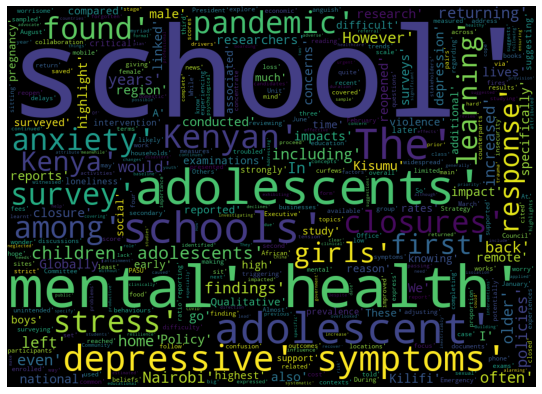

In [ ]:
from wordcloud import WordCloud, STOPWORDS
customStopwords=list(stop_words)


wordcloudimage=WordCloud(max_words=2400,
                         max_font_size=500,
                         font_step=2,
                         stopwords=customStopwords,
                         background_color='black',
                         width=1000,
                         height=720).generate(str(textdata))                          
 
plt.figure(figsize=(15,7))
plt.axis("off")
plt.imshow(wordcloudimage)
wordcloudimage
plt.show()

**SENTIMENT ANALYSIS**

*For Sentiment Analysis, we’ll use VADER Sentiment Analysis,*

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [ ]:
sid = SentimentIntensityAnalyzer()
TEXT = lemmatized_data
print(TEXT)

impact school closure stress adolescent mental health Kenya The first case reached Kenya March triggering national response including closure business school strict curfew While measure may saved life also widespread unintended secondary impact Kenyan household Globally researcher finding report depression anxiety mental health concern In Kenya specifically recent news report highlight worrisome trend fire school potentially linked increased stress difficulty adjusting school reopen However limited research available African context work address adolescent mental health impact pandemic education mental health outcome region I anxiety left school sit exam left school told know would go back school So giving stress I wonder would go back school would Council researcher collaboration Kenyan National Emergency Response Committee Kenyan Executive Office President Policy Strategy Unit PASU set explore surveying pair across four location Kenya The finding presented three site Kisumu Kilifi Na

In [ ]:
scores = sid.polarity_scores(TEXT)
for key in sorted(scores):
        print('{0}: {1}, '.format(key, scores[key]), end='')

compound: -0.9971, neg: 0.194, neu: 0.726, pos: 0.08, 

*A more understandable way*

In [ ]:
# function to print sentiments
TEXT = lemmatized_data
def sentiment_scores(TEXT):
# Create a SentimentIntensityAnalyzer object.
    sid_obj = SentimentIntensityAnalyzer()
# polarity_scores method of SentimentIntensityAnalyzer
# oject gives a sentiment dictionary.
# which contains pos, neg, neu, and compound scores.
    sentiment_dict = sid_obj.polarity_scores(TEXT)
    print("Overall sentiment dictionary is : ", sentiment_dict)
    print("sentence was rated as ", sentiment_dict['neg']*100, "% Negative")
    print("sentence was rated as ", sentiment_dict['neu']*100, "% Neutral")
    print("sentence was rated as ", sentiment_dict['pos']*100, "% Positive")
    print("Sentence Overall Rated As", end = " ")
    # decide sentiment as positive, negative and neutral
    if sentiment_dict['compound'] >= 0.05 :
        print("Positive")
    elif sentiment_dict['compound'] <= - 0.05 :
        print("Negative")
    else :
        print("Neutral")

In [ ]:
sentiment_scores(TEXT)

Overall sentiment dictionary is :  {'neg': 0.194, 'neu': 0.726, 'pos': 0.08, 'compound': -0.9971}
sentence was rated as  19.400000000000002 % Negative
sentence was rated as  72.6 % Neutral
sentence was rated as  8.0 % Positive
Sentence Overall Rated As Negative


*This analysis shows a very negative impact on the students after covid-19. For future work.,a large dataset would be able to give visual comparison of the before snd after analysis of the pandemic*

**WAY TO SOLVE THIS**

*The best way to solve this is by guidance and counseling.
Artificial Intelligence helps in creation of an AI therapy app .
This app uses a chatbot to communicate with the student and immediately refers the student to a professional when some key words like suicide are mentioned
I used k connect to make the AI therapy app and trained the bot to answer some questions.*